In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [66]:
house = pd.read_csv('house_ratio.csv')
house

,Unnamed: 0,취업여부,성별,연령,학력,수학구분,총소비지출액,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
0,0,1,1,27,6,1,1399222,0.064427,0.415963,0.244712,0.188750,0.059858,0.026291
1,1,1,2,24,5,1,958911,0.245174,0.340638,0.187129,0.054152,0.000000,0.172908
2,2,1,1,29,6,1,1468274,0.036024,0.377873,0.356318,0.067386,0.054878,0.107521
3,3,2,2,28,5,1,1127203,0.113733,0.344184,0.218071,0.041361,0.016412,0.266240
4,4,2,2,25,6,1,495179,0.067798,0.426464,0.330513,0.093508,0.000000,0.081718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,1623,1,2,29,6,1,2404487,0.024884,0.207224,0.555790,0.070363,0.000000,0.141740
1602,1624,2,1,29,6,1,1819355,0.006376,0.393050,0.508189,0.035582,0.004650,0.052152
1603,1625,1,2,28,4,1,1812551,0.051116,0.293079,0.467993,0.105051,0.000000,0.082762
1604,1626,1,1,27,4,1,943867,0.014303,0.565593,0.307965,0.071720,0.000000,0.040419


In [67]:
house.drop('Unnamed: 0',axis=1,inplace=True)

In [68]:
info = house[['취업여부','성별','연령','학력','수학구분','총소비지출액']]

In [69]:
process=house.drop(["취업여부","성별","연령","학력",'수학구분','총소비지출액'],axis=1)

In [70]:
process

,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
0,0.064427,0.415963,0.244712,0.188750,0.059858,0.026291
1,0.245174,0.340638,0.187129,0.054152,0.000000,0.172908
2,0.036024,0.377873,0.356318,0.067386,0.054878,0.107521
3,0.113733,0.344184,0.218071,0.041361,0.016412,0.266240
4,0.067798,0.426464,0.330513,0.093508,0.000000,0.081718
...,...,...,...,...,...,...
1601,0.024884,0.207224,0.555790,0.070363,0.000000,0.141740
1602,0.006376,0.393050,0.508189,0.035582,0.004650,0.052152
1603,0.051116,0.293079,0.467993,0.105051,0.000000,0.082762
1604,0.014303,0.565593,0.307965,0.071720,0.000000,0.040419


In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [71]:
sc = StandardScaler()
scaled = sc.fit_transform(process)
pd.DataFrame(scaled)

,0,1,2,3,4,5
0,-0.014689,0.896683,-0.936199,1.267657,0.258381,-0.992040
1,2.883749,0.212232,-1.340647,-0.556817,-0.474300,0.846717
2,-0.470162,0.550572,-0.152301,-0.377432,0.197422,0.026693
3,0.775971,0.244447,-1.123319,-0.730203,-0.273409,2.017229
4,0.039360,0.992106,-0.333553,-0.023352,-0.474300,-0.296917
...,...,...,...,...,...,...
1601,-0.648803,-1.000073,1.248740,-0.337083,-0.474300,0.455831
1602,-0.945595,0.688484,0.914404,-0.808536,-0.417382,-0.667711
1603,-0.228150,-0.219932,0.632074,0.133116,-0.474300,-0.283825
1604,-0.818479,2.256340,-0.491923,-0.318685,-0.474300,-0.814860


In [11]:
clusters=linkage(scaled,method='complete',metric='euclidean')

In [12]:
clusters.shape

(1605, 4)

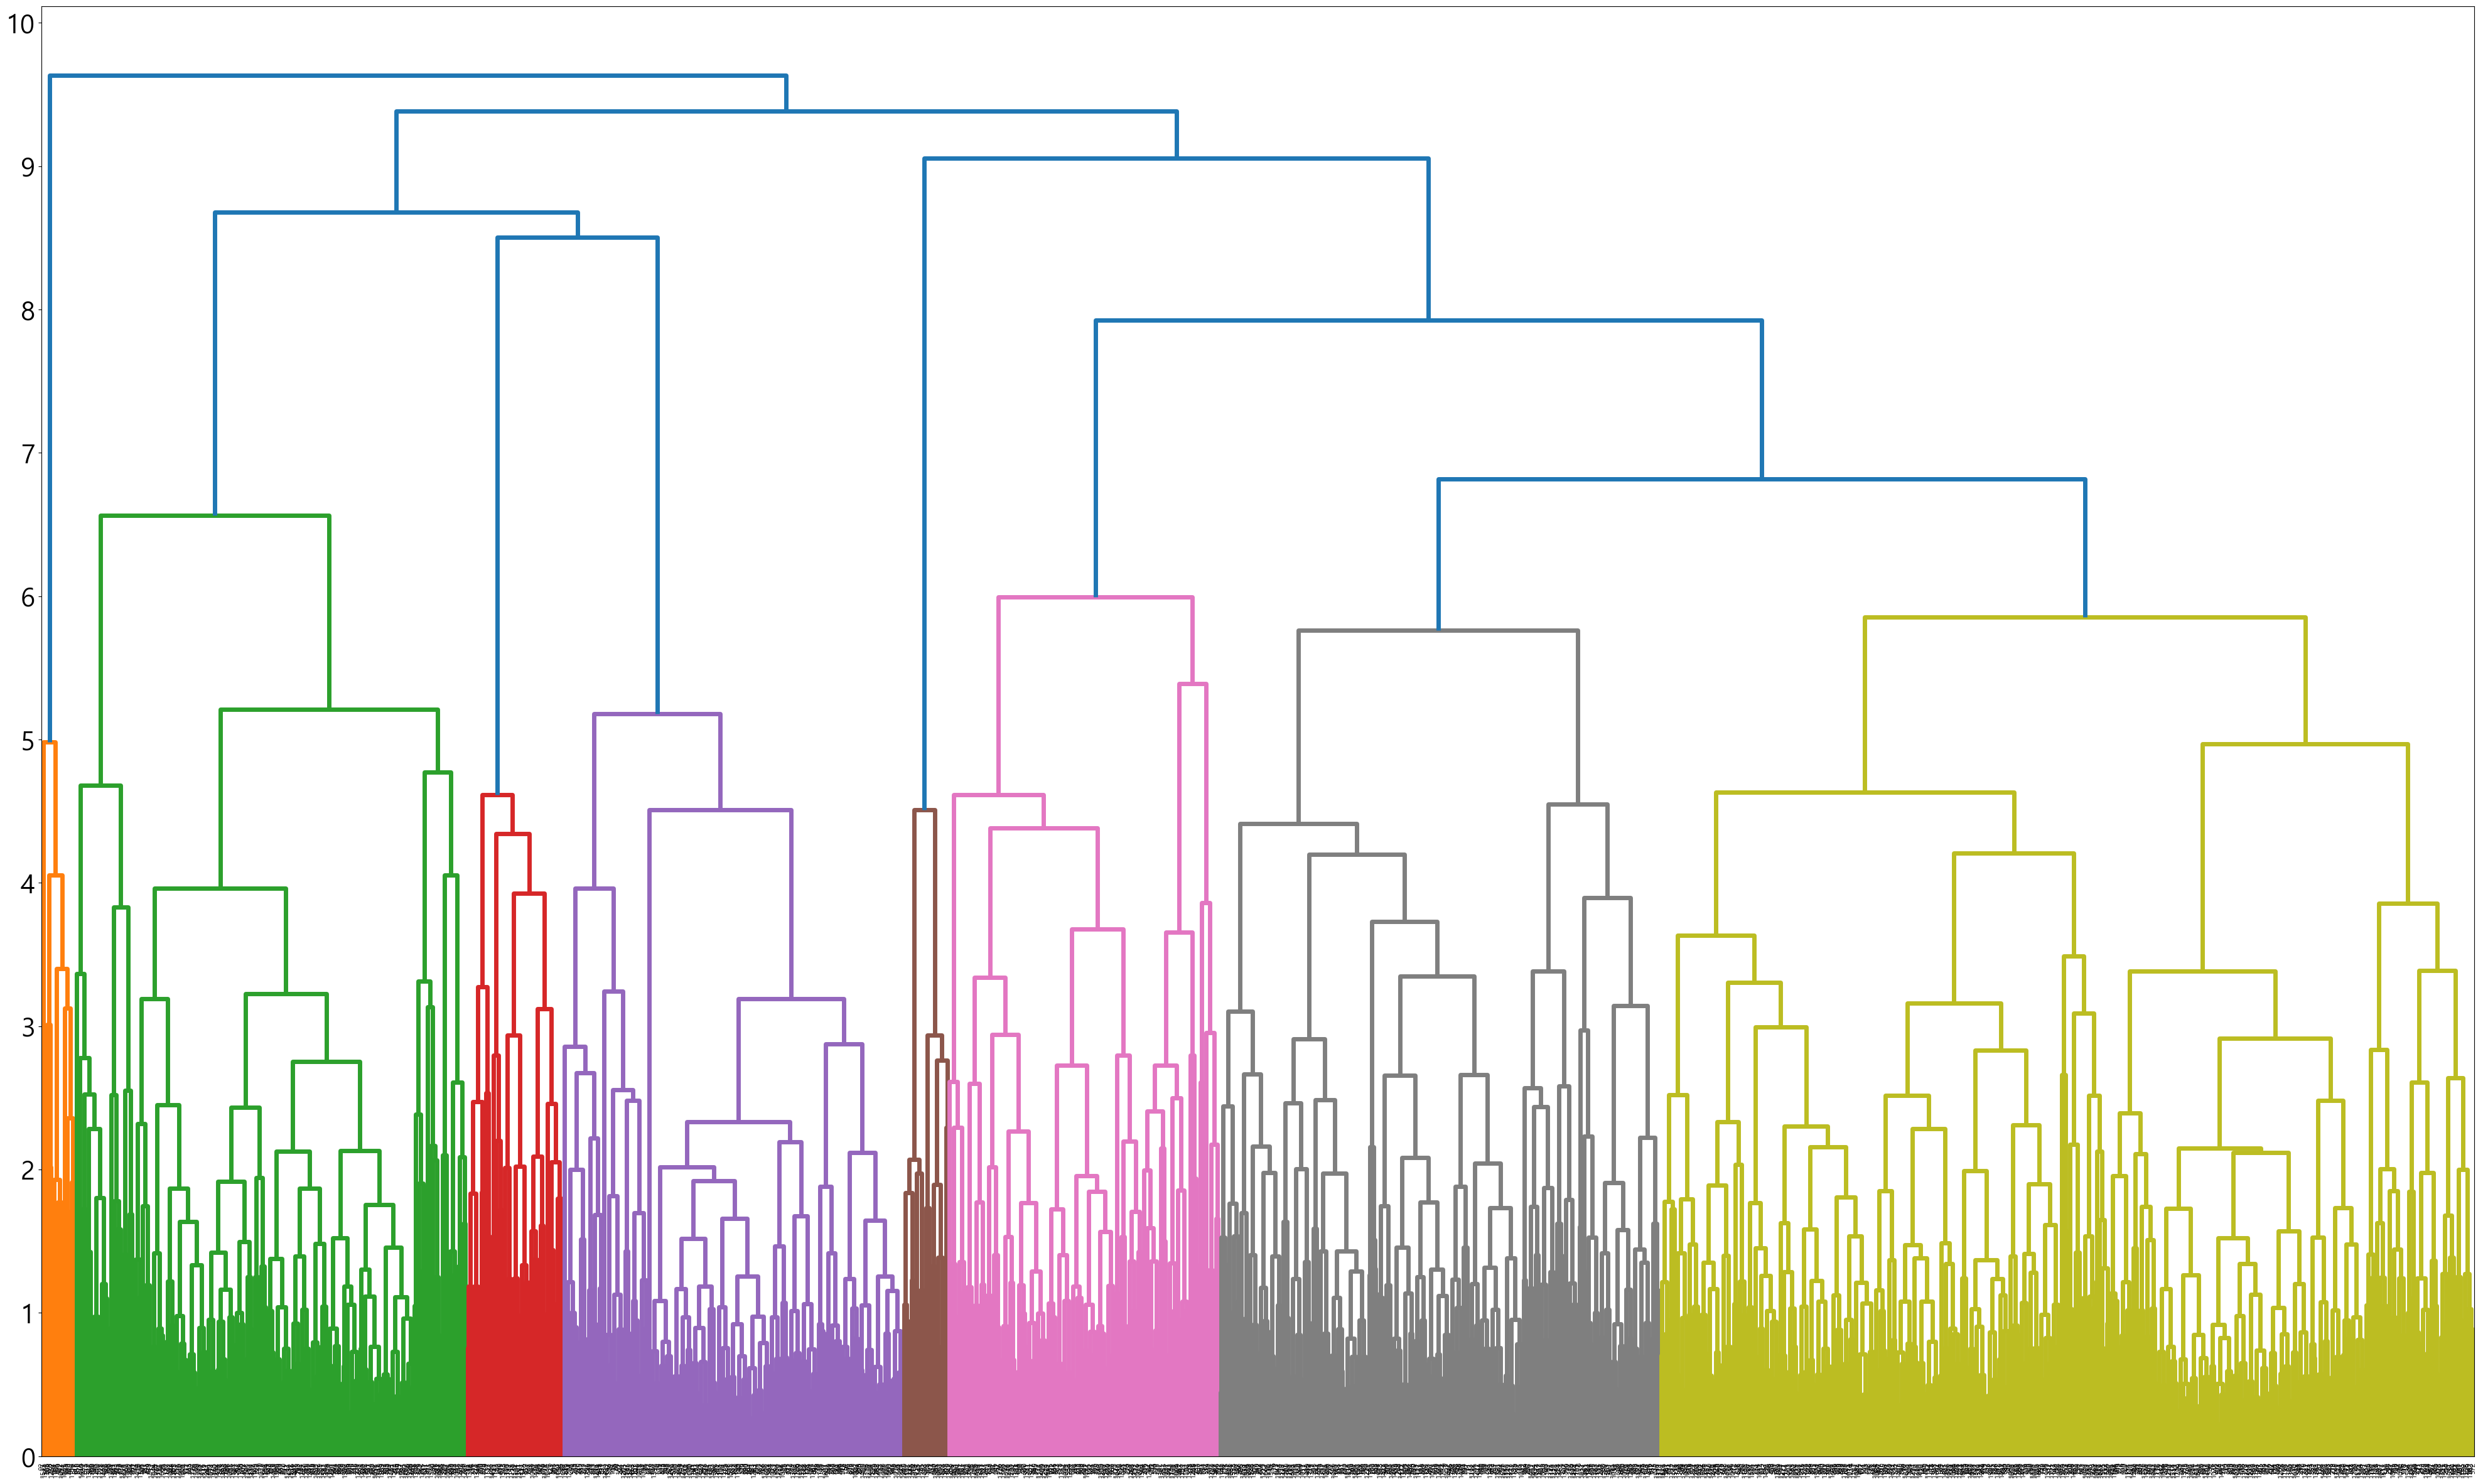

In [112]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(1, 1, 1)
with plt.rc_context({'lines.linewidth': 5}):
    plt.yticks(np.arange(0,11,1),fontsize=40)
    ax.tick_params(axis='y', which='major', labelsize=30)
    dendrogram(clusters,leaf_rotation=90,leaf_font_size=8)

# leaf_rotation: 글자 각도
# leaf_font_size=20: 글자 사이즈
plt.show()


In [72]:
# scaled 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=8,random_state=2)
clusters2 = kmeans.fit(scaled)

C:\Users\byjoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\byjoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [73]:
#클러스터링 변수인 clusters 값을 원본 데이터인 'house' 내에 넣기
house['cluster'] = clusters2.labels_
process['cluster'] = clusters2.labels_
house.head()

,취업여부,성별,연령,학력,수학구분,총소비지출액,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용,cluster
0,1,1,27,6,1,1399222,0.064427,0.415963,0.244712,0.188750,0.059858,0.026291,6
1,1,2,24,5,1,958911,0.245174,0.340638,0.187129,0.054152,0.000000,0.172908,0
2,1,1,29,6,1,1468274,0.036024,0.377873,0.356318,0.067386,0.054878,0.107521,5
3,2,2,28,5,1,1127203,0.113733,0.344184,0.218071,0.041361,0.016412,0.266240,7
4,2,2,25,6,1,495179,0.067798,0.426464,0.330513,0.093508,0.000000,0.081718,6


In [12]:
from sklearn.decomposition import PCA
X = scaled.copy()
# 객체
pca = PCA(n_components=2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca
# 결과는 array형태로 출력

array([[-0.81975809,  1.52508291],
       [-2.37792489, -1.1379424 ],
       [-0.09238747,  0.29809874],
       ...,
       [ 0.78144997,  0.21120516],
       [-0.37242412,  2.16231443],
       [ 0.17636436,  0.49402926]])

In [13]:
# x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = house['cluster']
pca_df.head()

,0,1,cluster
0,-0.819758,1.525083,6
1,-2.377925,-1.137942,0
2,-0.092387,0.298099,5
3,-1.858999,-1.076607,7
4,-0.413988,0.936971,6


In [14]:
axs = plt.subplots()
axs = sns.scatterplot(data=pca_df, x=0,y=1,hue='cluster')

NameError: name 'plt' is not defined

In [15]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 600)
transformed = model.fit_transform(scaled)

## T-SNE로 시각화

In [46]:
data_df = pd.DataFrame(transformed)

In [88]:
data_df['소비유형']=process['소비유형']

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'K-Means 군집분석 결과 차원축소 시각화')

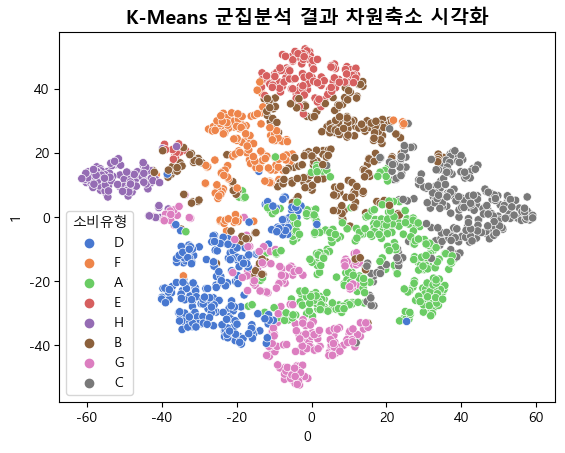

In [89]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
axs = sns.scatterplot(data=data_df, x=0,y=1,hue='소비유형',palette='muted')
axs.set_title('K-Means 군집분석 결과 차원축소 시각화', fontsize=14, fontweight='bold')

In [23]:
clusters2.labels_

array([6, 0, 5, ..., 5, 6, 5])

In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(process, clusters2.labels_, metric='euclidean')

0.8270834334149947

In [23]:
round(house.groupby('cluster').mean(),2)

,취업여부,성별,연령,학력,수학구분,총소비지출액,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
cluster,,,,,,,,,,,,
0,1.13,1.65,25.45,5.66,1.37,1672394.92,0.20,0.29,0.29,0.09,0.03,0.10
1,1.22,1.49,25.40,5.43,1.45,1775861.30,0.04,0.22,0.60,0.06,0.02,0.06
2,1.21,1.39,25.91,5.46,1.45,1556802.46,0.04,0.28,0.34,0.24,0.03,0.07
3,1.14,1.76,25.77,5.53,1.35,1560379.91,0.08,0.28,0.39,0.07,0.03,0.15
4,1.13,1.51,25.34,6.08,1.64,1860871.41,0.05,0.23,0.26,0.06,0.31,0.09
5,1.16,1.38,25.84,5.38,1.38,1320245.31,0.03,0.38,0.44,0.08,0.01,0.06
6,1.19,1.37,25.61,5.55,1.45,1206641.82,0.06,0.49,0.24,0.10,0.02,0.10
7,1.13,1.69,26.39,5.57,1.22,1877987.09,0.07,0.26,0.27,0.07,0.02,0.30


In [26]:
house['cluster'].value_counts()/1606

5    0.200498
3    0.156289
1    0.155666
6    0.141968
2    0.118929
0    0.092154
7    0.075342
4    0.059153
Name: cluster, dtype: float64

In [66]:
process['cluster']=process['cluster'].astype('float')

In [77]:
process.rename(columns={'cluster2':'소비유형'},inplace=True)

In [18]:
process['cluster2']=0

In [19]:
process

,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용,cluster,cluster2
0,0.064427,0.415963,0.244712,0.188750,0.059858,0.026291,6,0
1,0.245174,0.340638,0.187129,0.054152,0.000000,0.172908,0,0
2,0.036024,0.377873,0.356318,0.067386,0.054878,0.107521,5,0
3,0.113733,0.344184,0.218071,0.041361,0.016412,0.266240,7,0
4,0.067798,0.426464,0.330513,0.093508,0.000000,0.081718,6,0
...,...,...,...,...,...,...,...,...
1601,0.024884,0.207224,0.555790,0.070363,0.000000,0.141740,1,0
1602,0.006376,0.393050,0.508189,0.035582,0.004650,0.052152,5,0
1603,0.051116,0.293079,0.467993,0.105051,0.000000,0.082762,5,0
1604,0.014303,0.565593,0.307965,0.071720,0.000000,0.040419,6,0


In [20]:
process['cluster2']=process['cluster2'].astype('string')

In [36]:
process.drop(['cluster',7],axis=1,inplace=True)

In [74]:
process.loc[process['cluster']==0,'cluster2']="F"
process.loc[process['cluster']==1,'cluster2']="C"
process.loc[process['cluster']==2,'cluster2']="G"
process.loc[process['cluster']==3,'cluster2']="B"
process.loc[process['cluster']==4,'cluster2']="H"
process.loc[process['cluster']==5,'cluster2']="A"
process.loc[process['cluster']==6,'cluster2']="D"
process.loc[process['cluster']==7,'cluster2']="E"

In [80]:
process

,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용,cluster,소비유형
0,0.064427,0.415963,0.244712,0.188750,0.059858,0.026291,6,D
1,0.245174,0.340638,0.187129,0.054152,0.000000,0.172908,0,F
2,0.036024,0.377873,0.356318,0.067386,0.054878,0.107521,5,A
3,0.113733,0.344184,0.218071,0.041361,0.016412,0.266240,7,E
4,0.067798,0.426464,0.330513,0.093508,0.000000,0.081718,6,D
...,...,...,...,...,...,...,...,...
1601,0.024884,0.207224,0.555790,0.070363,0.000000,0.141740,1,C
1602,0.006376,0.393050,0.508189,0.035582,0.004650,0.052152,5,A
1603,0.051116,0.293079,0.467993,0.105051,0.000000,0.082762,5,A
1604,0.014303,0.565593,0.307965,0.071720,0.000000,0.040419,6,D


In [ ]:
process

In [27]:
pd.set_option('display.max_rows', None)

In [103]:
process.drop('Unnamed: 0',axis=1,inplace=True)

In [83]:
process.drop('cluster',axis=1,inplace=True)

In [84]:
feature=process.groupby(['소비유형']).mean()

In [85]:
feature

,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
소비유형,,,,,,
A,0.034388,0.376593,0.436026,0.079198,0.014740,0.059055
B,0.080954,0.282959,0.387968,0.071189,0.028509,0.148422
C,0.036873,0.222596,0.601818,0.057223,0.017300,0.064191
D,0.056426,0.487454,0.236352,0.102887,0.018184,0.098698
E,0.070620,0.264133,0.272253,0.066323,0.021985,0.304684
F,0.204146,0.294562,0.285081,0.085240,0.028567,0.102404
G,0.042770,0.279635,0.340224,0.236033,0.027935,0.073402
H,0.047766,0.226480,0.261376,0.064030,0.311942,0.088406


In [86]:
for i in feature.columns:
    feature[i+"특징"] = feature[i]>process[i].mean()

In [87]:
feature

,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용,의류신발특징,음식특징,생활필수특징,여가특징,IT 및 교육특징,건강 및 미용특징
소비유형,,,,,,,,,,,,
A,0.034388,0.376593,0.436026,0.079198,0.014740,0.059055,False,True,True,False,False,False
B,0.080954,0.282959,0.387968,0.071189,0.028509,0.148422,True,False,True,False,False,True
C,0.036873,0.222596,0.601818,0.057223,0.017300,0.064191,False,False,True,False,False,False
D,0.056426,0.487454,0.236352,0.102887,0.018184,0.098698,False,True,False,True,False,False
E,0.070620,0.264133,0.272253,0.066323,0.021985,0.304684,True,False,False,False,False,True
F,0.204146,0.294562,0.285081,0.085240,0.028567,0.102404,True,False,False,False,False,False
G,0.042770,0.279635,0.340224,0.236033,0.027935,0.073402,False,False,False,True,False,False
H,0.047766,0.226480,0.261376,0.064030,0.311942,0.088406,False,False,False,False,True,False


In [30]:
for i in house.columns:
    print(f"{i}의 전체평균은",house[i].mean())

취업여부의 전체평균은 1.1699875466998755
성별의 전체평균은 1.5118306351183064
연령의 전체평균은 25.712951432129515
학력의 전체평균은 5.5280199252802
수학구분의 전체평균은 1.4072229140722292
총소비지출액의 전체평균은 1547158.7471980075
의류신발의 전체평균은 0.06534324452422924
음식의 전체평균은 0.31728228186689106
생활필수의 전체평균은 0.3780020865182008
여가의 전체평균은 0.09523038797269803
IT 및 교육의 전체평균은 0.03874913013920361
건강 및 미용의 전체평균은 0.1053930983068978
cluster의 전체평균은 3.480697384806974


In [31]:
round(feature,2)

,취업여부,성별,연령,학력,수학구분,총소비지출액,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용,취업여부특징,성별특징,연령특징,학력특징,수학구분특징,총소비지출액특징,의류신발특징,음식특징,생활필수특징,여가특징,IT 및 교육특징,건강 및 미용특징
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,1.13,1.65,25.45,5.66,1.37,1672394.92,0.20,0.29,0.29,0.09,0.03,0.10,False,True,False,True,False,True,True,False,False,False,False,False
1,1.22,1.49,25.40,5.43,1.45,1775861.30,0.04,0.22,0.60,0.06,0.02,0.06,True,False,False,False,True,True,False,False,True,False,False,False
2,1.21,1.39,25.91,5.46,1.45,1556802.46,0.04,0.28,0.34,0.24,0.03,0.07,True,False,True,False,True,True,False,False,False,True,False,False
3,1.14,1.76,25.77,5.53,1.35,1560379.91,0.08,0.28,0.39,0.07,0.03,0.15,False,True,True,True,False,True,True,False,True,False,False,True
4,1.13,1.51,25.34,6.08,1.64,1860871.41,0.05,0.23,0.26,0.06,0.31,0.09,False,False,False,True,True,True,False,False,False,False,True,False
5,1.16,1.38,25.84,5.38,1.38,1320245.31,0.03,0.38,0.44,0.08,0.01,0.06,False,False,True,False,False,False,False,True,True,False,False,False
6,1.19,1.37,25.61,5.55,1.45,1206641.82,0.06,0.49,0.24,0.10,0.02,0.10,True,False,False,True,True,False,False,True,False,True,False,False
7,1.13,1.69,26.39,5.57,1.22,1877987.09,0.07,0.26,0.27,0.07,0.02,0.30,False,True,True,True,False,True,True,False,False,False,False,True


In [54]:
round(house.groupby('소비유형').mean(),2)

KeyError: '소비유형'

In [33]:
round(house.groupby('cluster').min(),2)

,취업여부,성별,연령,학력,수학구분,총소비지출액,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
cluster,,,,,,,,,,,,
0,1,1,20,4,1,423746,0.13,0.09,0.09,0.00,0.00,0.00
1,1,1,20,3,1,157573,0.00,0.02,0.46,0.00,0.00,0.00
2,1,1,20,3,1,452893,0.00,0.08,0.09,0.15,0.00,0.00
3,1,1,20,4,1,536610,0.00,0.13,0.21,0.00,0.00,0.05
4,1,1,20,4,1,643421,0.00,0.06,0.09,0.00,0.18,0.00
5,1,1,20,3,1,356971,0.00,0.26,0.28,0.00,0.00,0.00
6,1,1,20,4,1,281010,0.00,0.36,0.05,0.00,0.00,0.00
7,1,1,20,4,1,546965,0.00,0.06,0.09,0.00,0.00,0.21


In [34]:
round(house.groupby('cluster').max(),2)

,취업여부,성별,연령,학력,수학구분,총소비지출액,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
cluster,,,,,,,,,,,,
0,2,2,29,7,5,7084272,0.44,0.48,0.54,0.32,0.18,0.27
1,2,2,29,7,5,21875463,0.19,0.36,0.92,0.20,0.19,0.20
2,2,2,29,7,5,3601387,0.18,0.49,0.57,0.45,0.22,0.21
3,2,2,29,8,5,3785513,0.16,0.42,0.53,0.17,0.17,0.24
4,2,2,29,8,5,3628807,0.16,0.39,0.46,0.27,0.48,0.30
5,2,2,29,8,5,2881535,0.14,0.54,0.60,0.17,0.18,0.15
6,2,2,29,7,5,2944470,0.16,0.79,0.35,0.27,0.17,0.22
7,2,2,29,8,5,10428773,0.25,0.52,0.61,0.19,0.19,0.53


In [35]:
round(process.groupby('cluster').mean(),2)

,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
cluster,,,,,,
0,0.20,0.29,0.29,0.09,0.03,0.10
1,0.04,0.22,0.60,0.06,0.02,0.06
2,0.04,0.28,0.34,0.24,0.03,0.07
3,0.08,0.28,0.39,0.07,0.03,0.15
4,0.05,0.23,0.26,0.06,0.31,0.09
5,0.03,0.38,0.44,0.08,0.01,0.06
6,0.06,0.49,0.24,0.10,0.02,0.10
7,0.07,0.26,0.27,0.07,0.02,0.30


In [36]:
round(process.groupby('cluster').min(),2)

,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
cluster,,,,,,
0,0.13,0.09,0.09,0.00,0.00,0.00
1,0.00,0.02,0.46,0.00,0.00,0.00
2,0.00,0.08,0.09,0.15,0.00,0.00
3,0.00,0.13,0.21,0.00,0.00,0.05
4,0.00,0.06,0.09,0.00,0.18,0.00
5,0.00,0.26,0.28,0.00,0.00,0.00
6,0.00,0.36,0.05,0.00,0.00,0.00
7,0.00,0.06,0.09,0.00,0.00,0.21


In [37]:
round(process.groupby('cluster').max(),2)

,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
cluster,,,,,,
0,0.44,0.48,0.54,0.32,0.18,0.27
1,0.19,0.36,0.92,0.20,0.19,0.20
2,0.18,0.49,0.57,0.45,0.22,0.21
3,0.16,0.42,0.53,0.17,0.17,0.24
4,0.16,0.39,0.46,0.27,0.48,0.30
5,0.14,0.54,0.60,0.17,0.18,0.15
6,0.16,0.79,0.35,0.27,0.17,0.22
7,0.25,0.52,0.61,0.19,0.19,0.53


In [38]:
feature=process.groupby('cluster').mean()
for i in feature.columns:
    feature[i+"특징"] = feature[i]>house[i].mean()
round(feature,2)

,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용,의류신발특징,음식특징,생활필수특징,여가특징,IT 및 교육특징,건강 및 미용특징
cluster,,,,,,,,,,,,
0,0.20,0.29,0.29,0.09,0.03,0.10,True,False,False,False,False,False
1,0.04,0.22,0.60,0.06,0.02,0.06,False,False,True,False,False,False
2,0.04,0.28,0.34,0.24,0.03,0.07,False,False,False,True,False,False
3,0.08,0.28,0.39,0.07,0.03,0.15,True,False,True,False,False,True
4,0.05,0.23,0.26,0.06,0.31,0.09,False,False,False,False,True,False
5,0.03,0.38,0.44,0.08,0.01,0.06,False,True,True,False,False,False
6,0.06,0.49,0.24,0.10,0.02,0.10,False,True,False,True,False,False
7,0.07,0.26,0.27,0.07,0.02,0.30,True,False,False,False,False,True


In [39]:
index=[]
scores=[]
for i in range(2,11):
    temp = KMeans(n_clusters=i, random_state=2). fit(scaled)
    labels = temp.labels_
    index.append(i)
    scores.append(silhouette_score(process, labels, metric='euclidean'))
    print("군집의 개수가",i,"개일 때의 실루의 계수", ':', silhouette_score(process, labels, metric='euclidean'))

군집의 개수가 2 개일 때의 실루의 계수 : 0.06958282988447292
군집의 개수가 3 개일 때의 실루의 계수 : -0.09365096967290311
군집의 개수가 4 개일 때의 실루의 계수 : -0.048764049025117495
군집의 개수가 5 개일 때의 실루의 계수 : -0.0025849709366631583
군집의 개수가 6 개일 때의 실루의 계수 : 0.08877287482024059
군집의 개수가 7 개일 때의 실루의 계수 : 0.3685097410108024
군집의 개수가 8 개일 때의 실루의 계수 : 0.8270834334149947
군집의 개수가 9 개일 때의 실루의 계수 : 0.36928752373987855
군집의 개수가 10 개일 때의 실루의 계수 : 0.32921383309623997


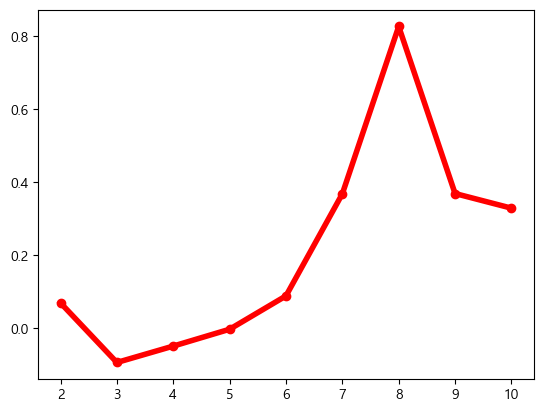

In [40]:
plt.plot(index,scores,marker='o',color='red',linewidth=4)
ax.tick_params(axis='both', which='major', labelsize=40)

In [93]:
process.to_csv('process.csv')

In [91]:
process

,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용,소비유형
0,0.064427,0.415963,0.244712,0.188750,0.059858,0.026291,D
1,0.245174,0.340638,0.187129,0.054152,0.000000,0.172908,F
2,0.036024,0.377873,0.356318,0.067386,0.054878,0.107521,A
3,0.113733,0.344184,0.218071,0.041361,0.016412,0.266240,E
4,0.067798,0.426464,0.330513,0.093508,0.000000,0.081718,D
...,...,...,...,...,...,...,...
1601,0.024884,0.207224,0.555790,0.070363,0.000000,0.141740,C
1602,0.006376,0.393050,0.508189,0.035582,0.004650,0.052152,A
1603,0.051116,0.293079,0.467993,0.105051,0.000000,0.082762,A
1604,0.014303,0.565593,0.307965,0.071720,0.000000,0.040419,D


In [42]:
for i in house.columns:
    print(i,house[i].mean())

취업여부 1.1699875466998755
성별 1.5118306351183064
연령 25.712951432129515
학력 5.5280199252802
수학구분 1.4072229140722292
총소비지출액 1547158.7471980075
의류신발 0.06534324452422924
음식 0.31728228186689106
생활필수 0.3780020865182008
여가 0.09523038797269803
IT 및 교육 0.03874913013920361
건강 및 미용 0.1053930983068978
cluster 3.480697384806974


In [100]:
process=pd.read_csv('process.csv',encoding='CP949')

In [86]:
process.drop(['소비유형'])

,Unnamed: 0,의류,음식,생활기초,여가,IT 및 교육,건강 및 미용,cluster,소비유형
0,0,0.064427,0.415963,0.244712,0.188750,0.059858,0.026291,6,D
1,1,0.245174,0.340638,0.187129,0.054152,0.000000,0.172908,0,F
2,2,0.036024,0.377873,0.356318,0.067386,0.054878,0.107521,5,B
3,3,0.113733,0.344184,0.218071,0.041361,0.016412,0.266240,7,E
4,4,0.067798,0.426464,0.330513,0.093508,0.000000,0.081718,6,D
5,5,0.082975,0.276108,0.159948,0.027629,0.441530,0.011810,4,H
6,6,0.151210,0.270812,0.370704,0.064337,0.000000,0.142936,3,A
7,7,0.004346,0.122336,0.308621,0.351654,0.039068,0.173976,2,G
8,8,0.203011,0.403273,0.160502,0.029359,0.159305,0.044551,0,F
9,9,0.100234,0.289797,0.437436,0.039923,0.000000,0.132610,3,A


In [91]:
data_df['소비유형']=process['소비유형']

In [92]:
data_df.drop('cluster',axis=1,inplace=True)

In [94]:
data_df.to_csv('data_df.csv')